## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [2]:
import pandas as pd
dataset = pd.read_csv("titanic.csv")

/tmp/ipykernel_3722/3537921043.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [3]:
total_male = dataset['Sex'].value_counts()['male']
total_female = dataset['Sex'].value_counts()['female']

survived_male_count = dataset[(dataset['Survived'] == 1) & (dataset['Sex'] == 'male')].shape[0]
survived_female_count =  dataset[(dataset['Survived'] == 1) & (dataset['Sex'] == 'female')].shape[0]

percent_survived_male = str(int((survived_male_count / total_male) * 100)) + "%"
percent_survived_female = str(int((survived_female_count / total_female) * 100)) + "%"

print('Percent survived of male:', percent_survived_male)
print('Percent survived of female:', percent_survived_female)

Percent survived of male: 18%
Percent survived of female: 74%


**Задача 2:** Відтворіть ці графіки  
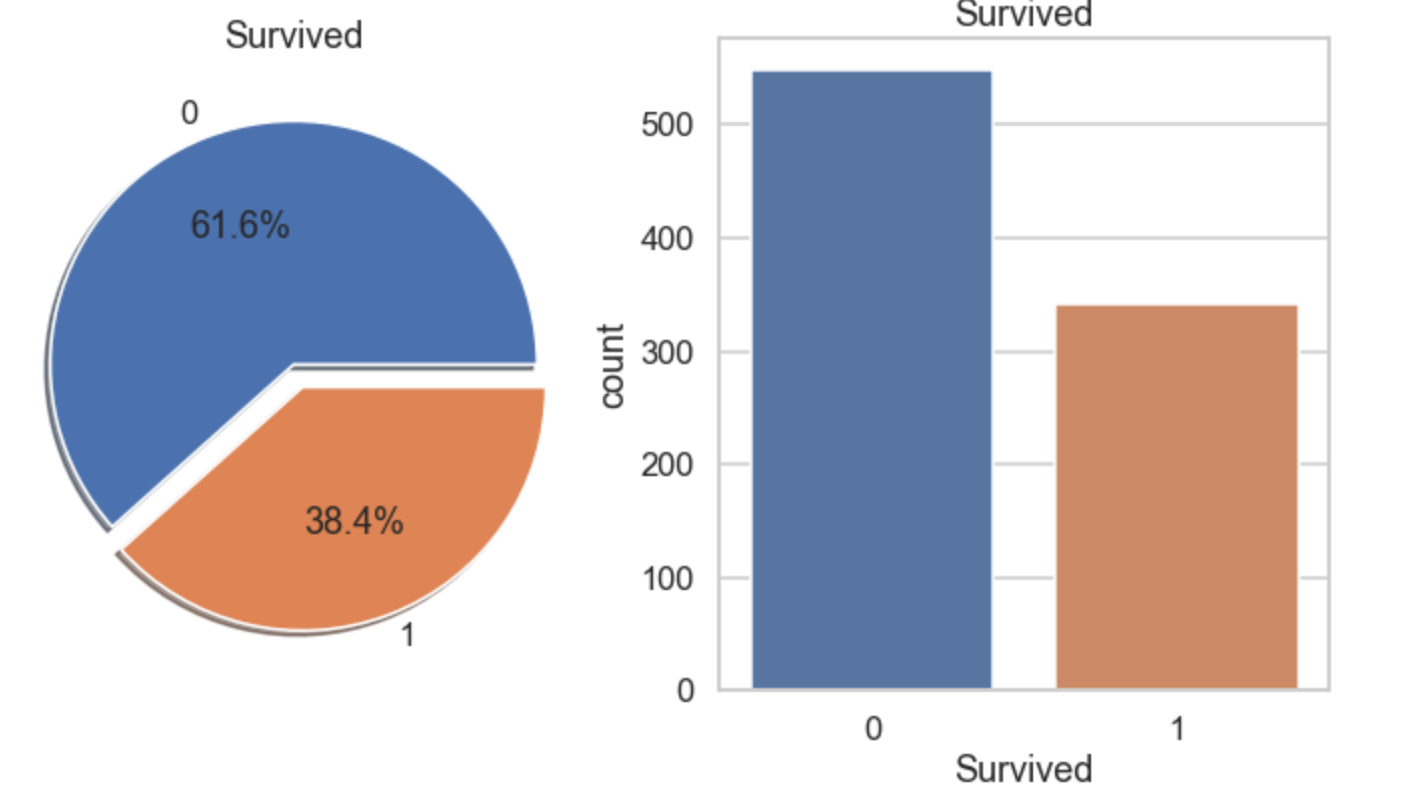


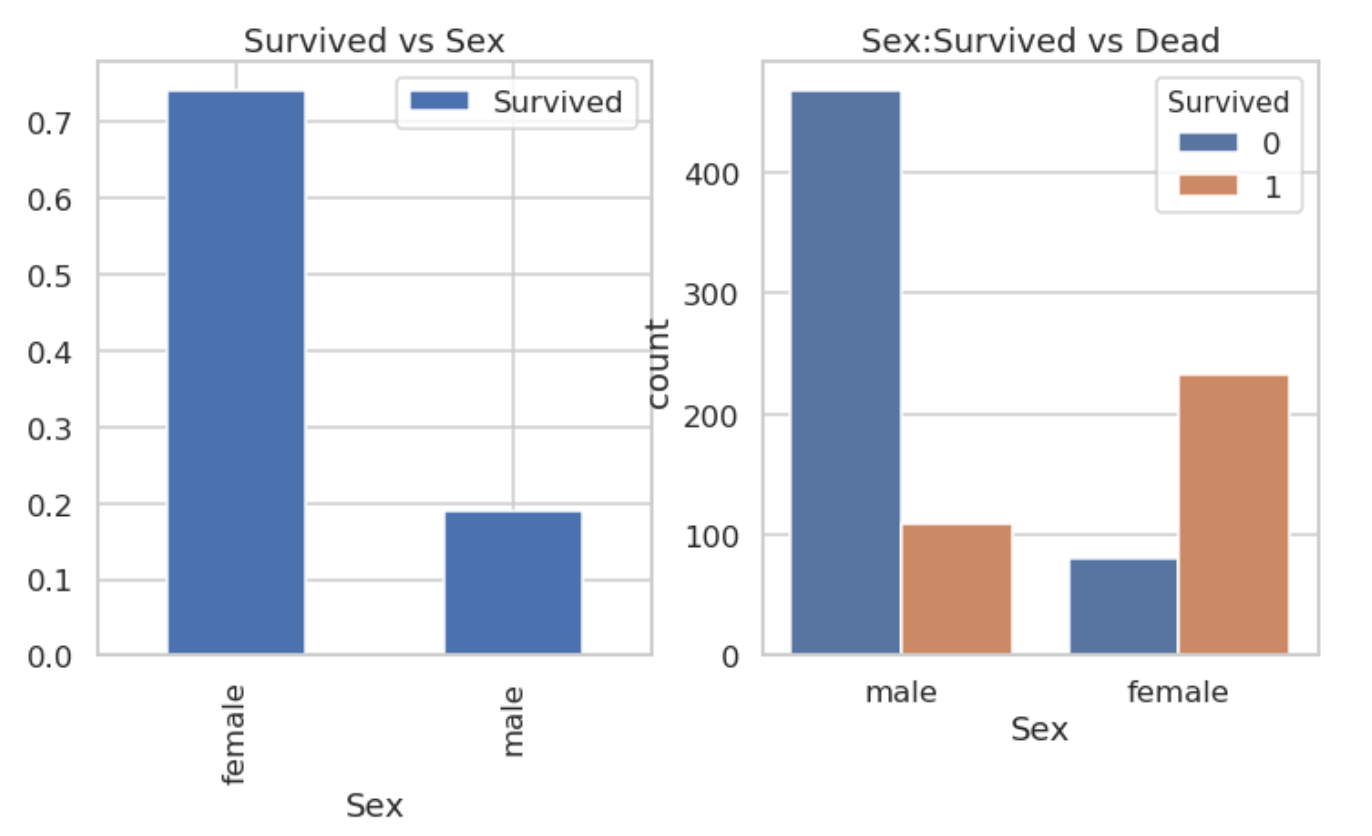

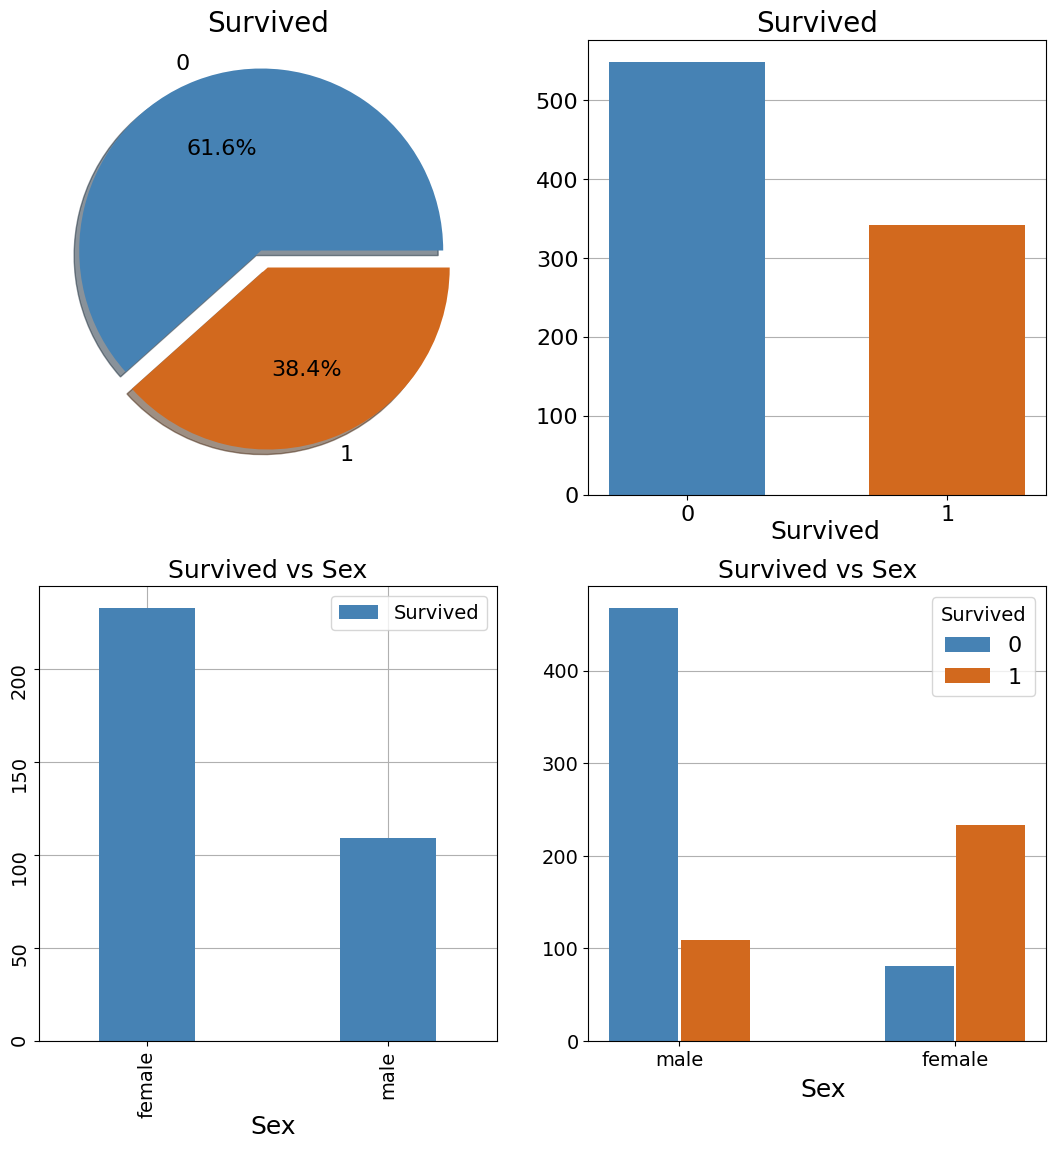

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(13, 13))

survived_count = dataset['Survived'].value_counts()[1]
not_survived_count = dataset['Survived'].value_counts()[0]

not_survived_male_count = dataset[(dataset['Survived'] == 0) & (dataset['Sex'] == 'male')].shape[0]
not_survived_female_count =  dataset[(dataset['Survived'] == 0) & (dataset['Sex'] == 'female')].shape[0]

ax[0, 0].pie([not_survived_count, survived_count], labels=["0", "1"], explode=[0.1, 0], shadow=True, colors=["steelblue", "chocolate"], autopct='%1.1f%%', textprops={'fontsize': 16})
ax[0, 0].set_title("Survived", size=20)

ax[0, 1].bar(["0", "1"], [not_survived_count, survived_count], width=0.6, color=["steelblue", "chocolate"])
ax[0, 1].set_title("Survived", size=20)
ax[0, 1].text(0.32, -55, "Survived", size=18)
ax[0, 1].tick_params(labelsize=16)
ax[0, 1].grid(axis="y")
ax[0, 1].set_axisbelow(True)

ax[1, 0].bar(["female", "male"], [survived_female_count, survived_male_count], width=0.4, color=["steelblue"])
ax[1, 0].set_title("Survived vs Sex", size=18)
ax[1, 0].text(0.43, -50, "Sex", size=18)
ax[1, 0].tick_params(labelsize=14, labelrotation=90)
ax[1, 0].legend(["Survived"], fontsize=14)
ax[1, 0].grid()
ax[1, 0].set_axisbelow(True)
ax[1, 0].set_xlim([-0.45, 1.45])

ax[1, 1].bar(["male", "female"], [not_survived_male_count, not_survived_female_count], width=0.25, color=["steelblue"])
ax[1, 1].bar(np.arange(2) + 0.26, [survived_male_count, survived_female_count], width=0.25, color=["chocolate"])
ax[1, 1].set_title("Survived vs Sex", size=18)
ax[1, 1].text(0.57, -60, "Sex", size=18)
ax[1, 1].tick_params(labelsize=14)
ax[1, 1].legend(["0", "1"], title="Survived", fontsize=16, title_fontsize=14)
ax[1, 1].grid(axis="y")
ax[1, 1].set_axisbelow(True)
ax[1, 1].set_xticks(np.arange(2) + 0.26 - 0.130)
ax[1, 1].set_xticklabels(["male", "female"])

plt.show()

Перший графік: на круговій діаграмі зображено відсотки виживших(38.4%) та загиблих(61.6%) людей на титаніку.

Другий графік: на стовпчастій діаграмі зображено кількість виживших та загиблих людей, синя колонка показує загиблих людей, а помаранчева виживших. Загиблих більше ніж виживших

Третій графік: на стовпчастій діаграмі зображено кількість виживших чоловіків та жінок, як можна побачити, вижило більше жінок ніж чоловіків.

Четвертий графік: на стовпчастій діаграмі зображено кількість виживших та загиблих по чоловікам та жінкам. У чоловикив більше загиблих ніж виживших, а у жінок більше виживших ніж загиблих.

Прокоментуйте побудовані графіки

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [5]:
print("Missing values:", dataset.isnull().sum().sum())

Missing values: 866


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [20]:
dataset['first_name'] = dataset['Name'].str.extract('(Mr\\. |Miss\\. |Master. |Mrs\\.[A-Za-z]*\\()([A-Za-z]*)')[1]
most_popular_female_name = dataset.loc[dataset['Sex'] == 'female', 'first_name'].value_counts()

most_popular_female_name = most_popular_female_name[most_popular_female_name > 1]
print("Most popular female name:", most_popular_female_name.index[0])


Most popular female name: Anna


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [21]:
dataset['first_name'] = dataset['Name'].str.extract('(Mr\\. |Miss\\. |Master. |Mrs\\.[A-Za-z]*\\()([A-Za-z]*)')[1]
most_popular_female_name = dataset.loc[dataset['Sex'] == 'male', 'first_name'].value_counts()

most_popular_female_name = most_popular_female_name[most_popular_female_name > 1]
print("Most popular female name:", most_popular_female_name.index[0])

Most popular female name: William


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
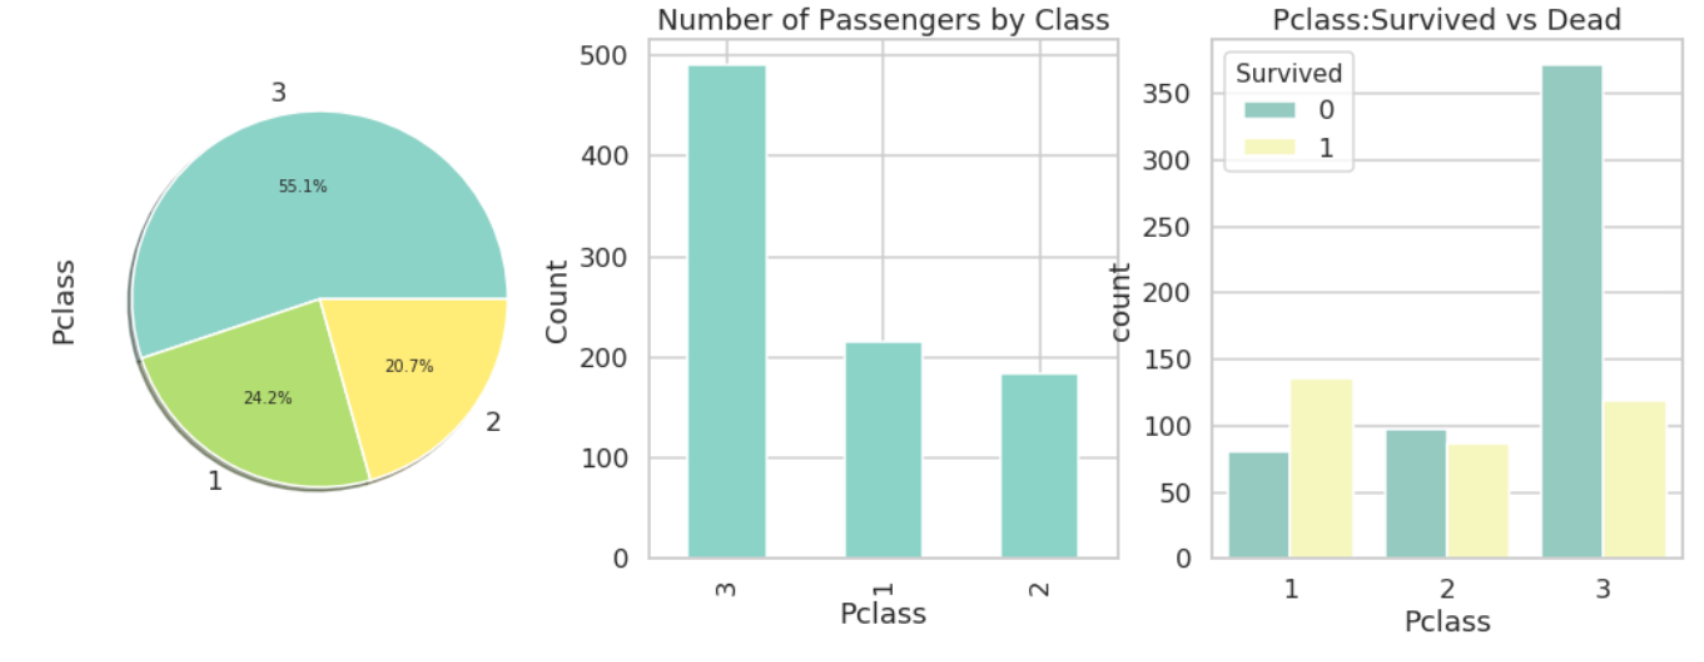

[Text(0.13, 0, '1'), Text(1.13, 0, '2'), Text(2.13, 0, '3')]

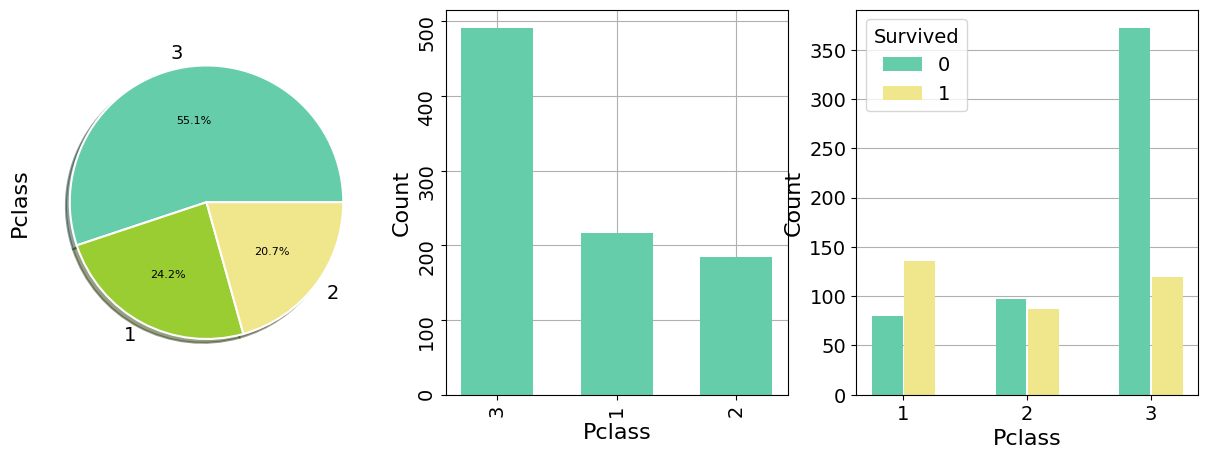

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

first_pclass = dataset[dataset['Pclass'] == 1].shape[0]
second_pclass = dataset[dataset['Pclass'] == 2].shape[0]
third_pclass = dataset[dataset['Pclass'] == 3].shape[0]

survived_first_pclass = dataset[(dataset['Pclass'] == 1) & (dataset['Survived'] == 1)].shape[0]
survived_second_pclass = dataset[(dataset['Pclass'] == 2) & (dataset['Survived'] == 1)].shape[0]
survived_third_pclass = dataset[(dataset['Pclass'] == 3) & (dataset['Survived'] == 1)].shape[0]

not_survived_first_pclass = dataset[(dataset['Pclass'] == 1) & (dataset['Survived'] == 0)].shape[0]
not_survived_second_pclass = dataset[(dataset['Pclass'] == 2) & (dataset['Survived'] == 0)].shape[0]
not_survived_third_pclass = dataset[(dataset['Pclass'] == 3) & (dataset['Survived'] == 0)].shape[0]

patches, texts, autotexts = ax[0].pie([third_pclass, first_pclass, second_pclass], labels=["3", "1", "2"], wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}, shadow=True, colors=["mediumaquamarine", "yellowgreen", "khaki"], autopct='%1.1f%%', textprops={'fontsize': 14})
ax[0].set_ylabel("Pclass", size=16)

for autotext in autotexts:
    autotext.set_fontsize(8)

ax[1].bar(["3", "1", "2"], [third_pclass, first_pclass, second_pclass], width=0.6, color=["mediumaquamarine"])
ax[1].set_xlabel("Pclass", size=16)
ax[1].set_ylabel("Count", size=16)
ax[1].tick_params(labelsize=14, labelrotation=90)
ax[1].grid()
ax[1].set_axisbelow(True)

ax[2].bar(["1", "2", "3"], [not_survived_first_pclass, not_survived_second_pclass, not_survived_third_pclass], width=0.25, color=["mediumaquamarine"])
ax[2].bar(np.arange(3) + 0.26, [survived_first_pclass, survived_second_pclass, survived_third_pclass], width=0.25, color=["khaki"])
ax[2].set_xlabel("Pclass", size=16)
ax[2].set_ylabel("Count", size=16)
ax[2].tick_params(labelsize=14)
ax[2].legend(["0", "1"], title="Survived", fontsize=14, title_fontsize=14)
ax[2].grid(axis="y")
ax[2].set_axisbelow(True)
ax[2].set_xticks(np.arange(3) + 0.26 - 0.130)
ax[2].set_xticklabels(["1", "2", "3"])

Перший графік: на круговій діаграмі зображено відсотки класу до якого належить пасажир. Більшість пасажирів належать до 3-го класу(55.1%), до 2-го належать 20.7% відсотків, а до 1-го 24.2% відсотки.

Другий графік: на стовпчастій діаграмі зображено кількість пасажирів до якого класу вони належать. Найбільше пасажирів належать до 3-го класу.

Третій графік: на стовпчастій діаграмі зображено виживші за класом, найбільше загиблих пасажирів у 3-му класі, а найбільше виживших пасажирів у 1-му класі.

Прокоментуйте побудовані графіки

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
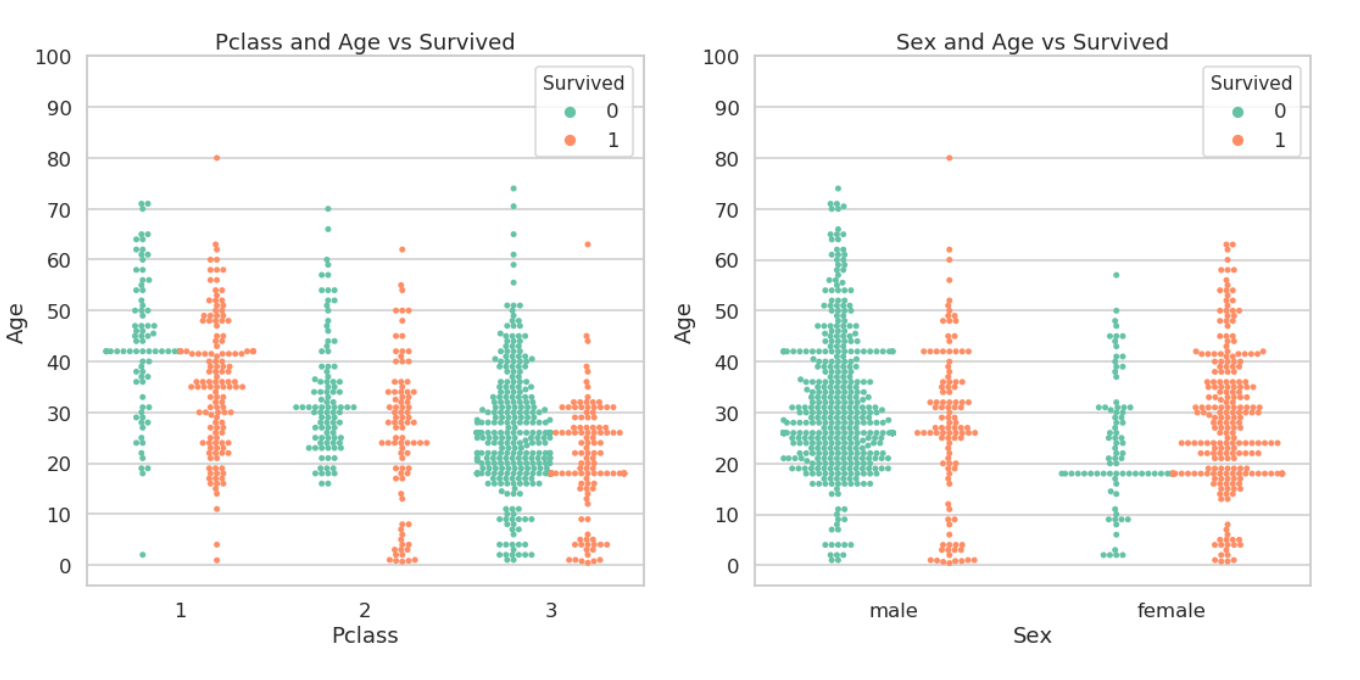![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

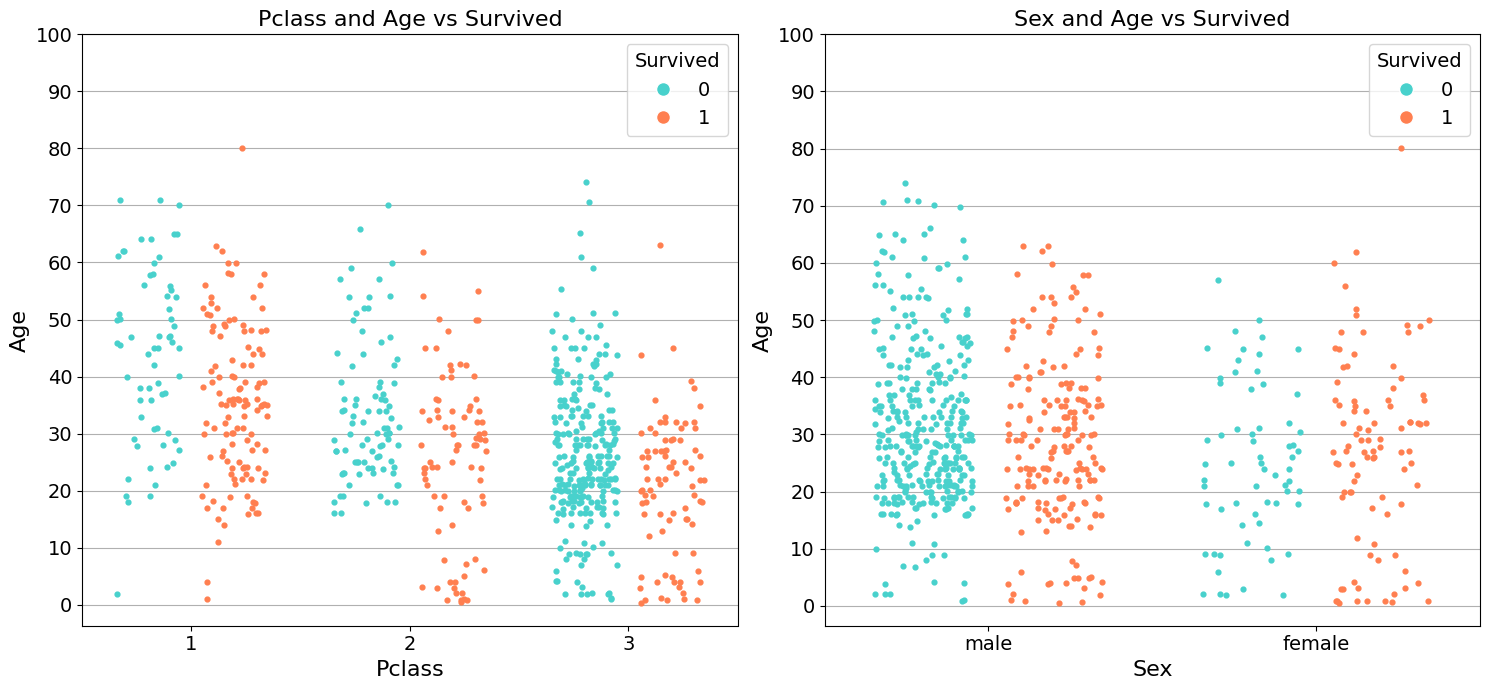

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

green_x_pclass = dataset[dataset['Survived'] == 0]['Pclass'] - 0.2 + np.random.uniform(-0.15, 0.15, len(dataset[dataset['Survived'] == 0]))
green_y_pclass = dataset[dataset['Survived'] == 0]['Age'] + np.random.uniform(-0.15, 0.15, len(dataset[dataset['Survived'] == 0]))
ax[0].scatter(green_x_pclass, green_y_pclass, c='mediumturquoise', s=12)

orange_x_pclass = dataset[dataset['Survived'] == 1]['Pclass'] + 0.2 + np.random.uniform(-0.15, 0.15, len(dataset[dataset['Survived'] == 1]))
orange_y_pclass = dataset[dataset['Survived'] == 1]['Age'] + np.random.uniform(-0.15, 0.15, len(dataset[dataset['Survived'] == 1]))
ax[0].scatter(orange_x_pclass, orange_y_pclass, c='coral', s=12)

ax[0].set_title("Pclass and Age vs Survived", size=16)
ax[0].set_xlabel("Pclass", size=16)
ax[0].set_ylabel("Age", size=16)
ax[0].tick_params(labelsize=14)
ax[0].grid(axis="y")
ax[0].set_axisbelow(True)
ax[0].set_yticks(np.arange(0, 110, 10))
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='mediumturquoise', markersize=10, label='0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='coral', markersize=10, label='1')]

ax[0].legend(handles=legend_elements, title="Survived", fontsize=14, title_fontsize=14)
ax[0].set_xticks([1, 2, 3])
ax[0].set_xticklabels(['1', '2', '3'])
ax[0].set_xlim(0.5, 3.5)


green_x_sex = np.where(dataset[dataset['Survived'] == 0]['Sex'] == "male", 0, 1) - 0.2 + np.random.uniform(-0.15, 0.15, len(dataset[dataset['Survived'] == 0]))
green_y_sex = dataset[dataset['Survived'] == 0]['Age'] + np.random.uniform(-0.15, 0.15, len(dataset[dataset['Survived'] == 0]))

orange_x_sex = np.where(dataset[dataset['Survived'] == 1]['Sex'] == "female", 0, 1) + 0.2 + np.random.uniform(-0.15, 0.15, len(dataset[dataset['Survived'] == 1]))
orange_y_sex = dataset[dataset['Survived'] == 1]['Age'] + np.random.uniform(-0.15, 0.15, len(dataset[dataset['Survived'] == 1]))

ax[1].scatter(green_x_sex, green_y_sex, c='mediumturquoise', s=12, label='Not Survived')
ax[1].scatter(orange_x_sex, orange_y_sex, c='coral', s=12, label='Survived')
ax[1].set_title("Sex and Age vs Survived", size=16)
ax[1].set_xlabel("Sex", size=16)
ax[1].set_ylabel("Age", size=16)
ax[1].tick_params(labelsize=14)
ax[1].grid(axis="y")
ax[1].set_axisbelow(True)
ax[1].set_yticks(np.arange(0, 110, 10))
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='mediumturquoise', markersize=10, label='0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='coral', markersize=10, label='1')]

ax[1].legend(handles=legend_elements, title="Survived", fontsize=14, title_fontsize=14)
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['male', 'female'])
ax[1].set_xlim(-0.5, 1.5)

plt.tight_layout()
plt.show()


Перший графік: на точковій діаграмі зображено виживших та загиблих пасажирів за віком та класом пасажира. Вісь Y показує скільки років було пасажирам, вісь X показує до якого класу належав пасажир.

Другий графік: на точковій діаграмі зображено виживших та загиблих пасажирів за статтю та віком. Вісь Y показує скільки років було пасажирам, а вісь X показує якої статті був пасажир.

Прокоментуйте побудовані графіки

**Задача 8** Побудуйте наступні діаграми розподілів:  

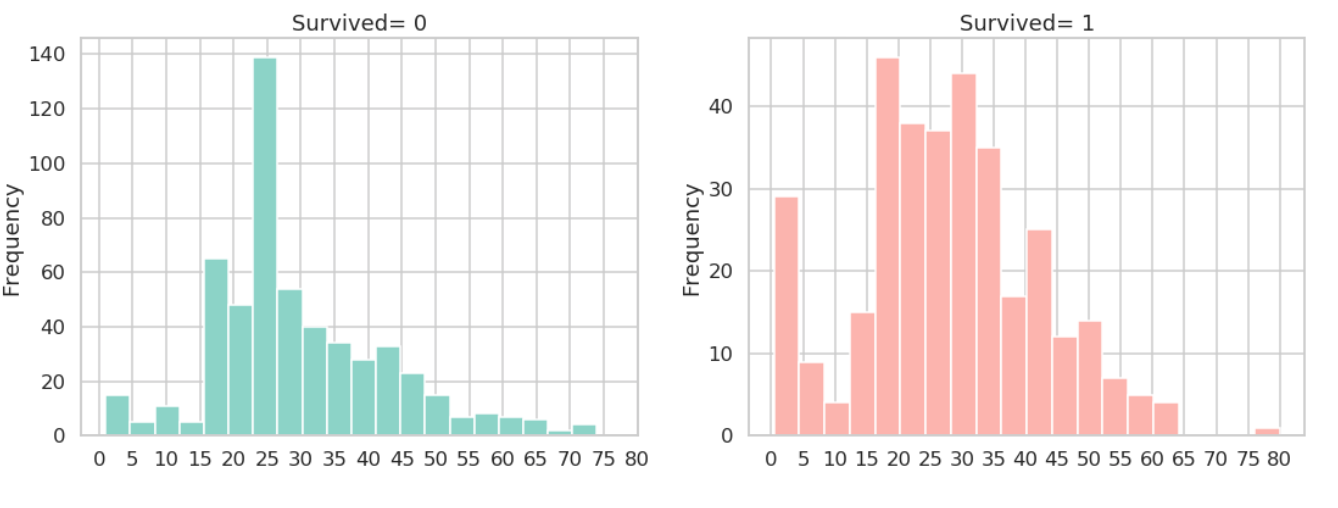



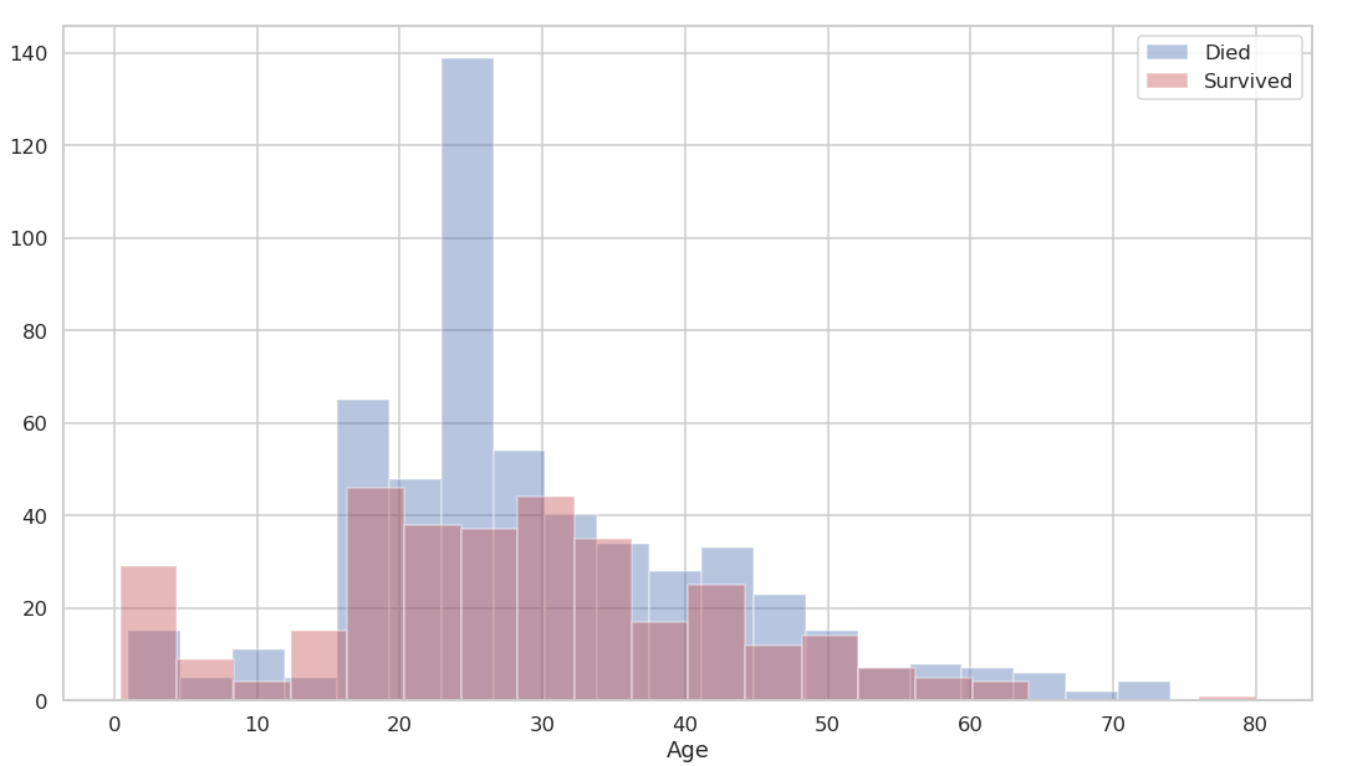

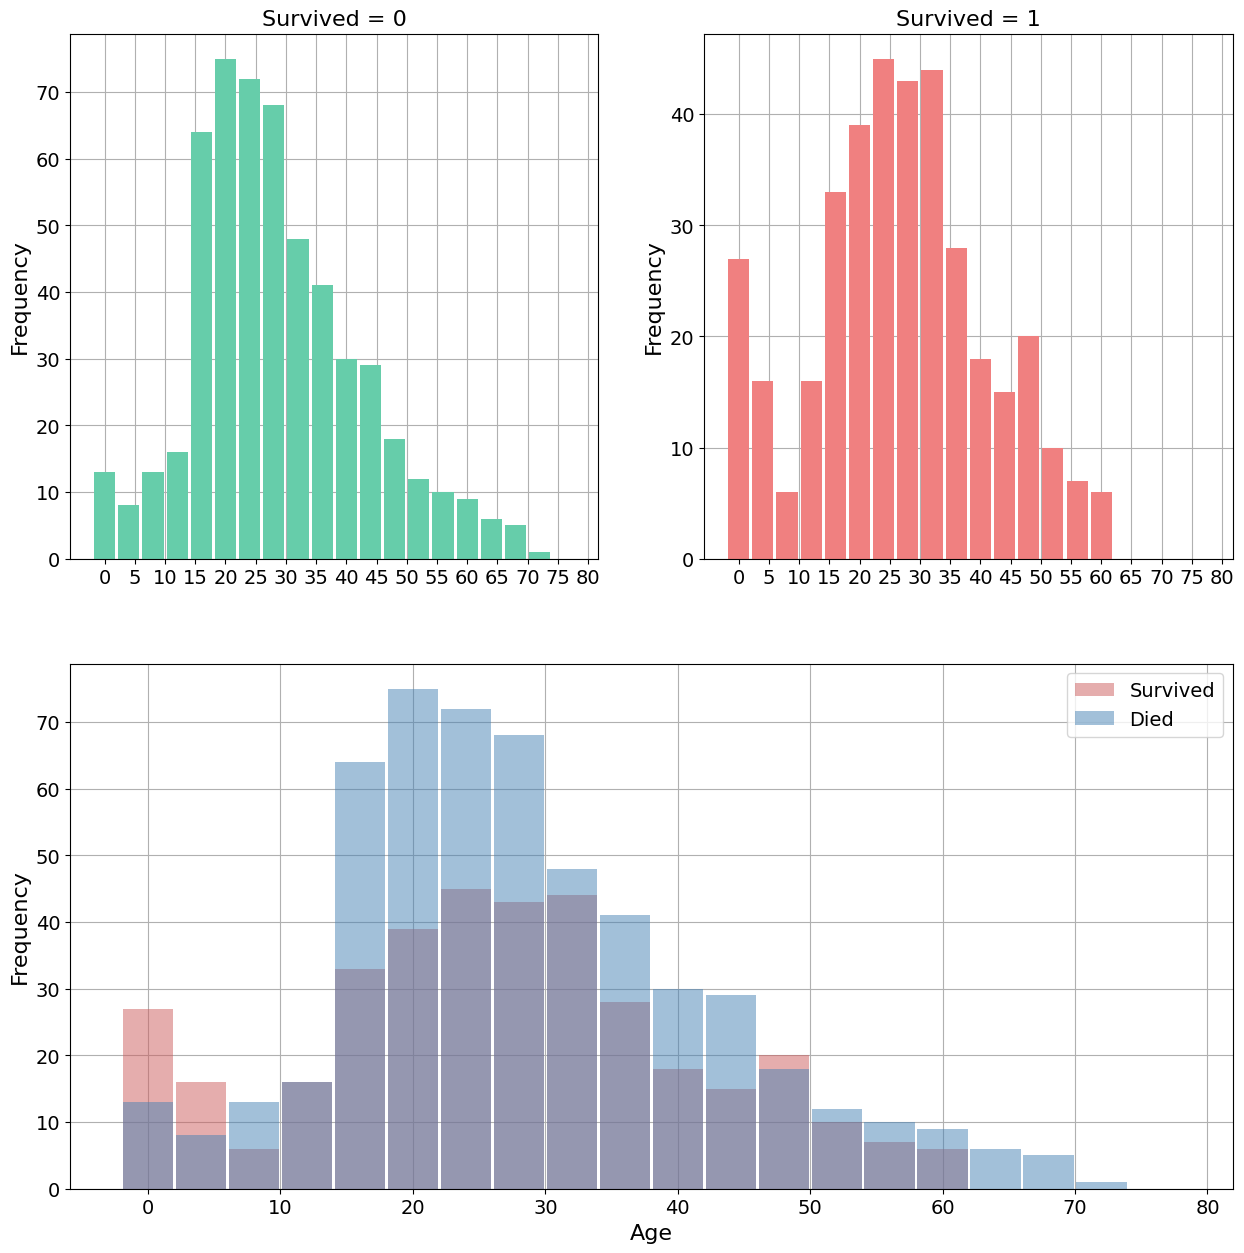

In [26]:
fig = plt.figure(figsize=(15, 15))
ax = fig.subplot_mosaic([["bar1", "bar2"],
                        ["bar3", "bar3"]])


not_survived_by_age = dataset[(dataset['Survived'] == 0) & (dataset['Age'] >= 0) & (dataset['Age'] <= 75)]['Age']
survived_by_age = dataset[(dataset['Survived'] == 1) & (dataset['Age'] >= 0) & (dataset['Age'] <= 75)]['Age']

not_survived_x = np.arange(0, 80, 4)
not_survived_y = [len(not_survived_by_age[(not_survived_by_age >= i) & (not_survived_by_age < i + 5)]) for i in not_survived_x]

survived_x = np.arange(0, 80, 4)
survived_y = [len(survived_by_age[(survived_by_age >= i) & (survived_by_age < i + 5)]) for i in survived_x]

custom_ticks = np.arange(0, 85, 5)
custom_labels = [str(i) for i in custom_ticks]

ax["bar1"].bar(not_survived_x, not_survived_y , width=3.5, color="mediumaquamarine")
ax["bar1"].set_title("Survived = 0", size=16)
ax["bar1"].set_ylabel("Frequency", size=16)
ax["bar1"].set_xticks(custom_ticks)
ax["bar1"].set_xticklabels(custom_labels)
ax["bar1"].tick_params(labelsize=14)
ax["bar1"].grid()
ax["bar1"].set_axisbelow(True)

ax["bar2"].bar(survived_x,survived_y, width=3.5, color="lightcoral")
ax["bar2"].set_title("Survived = 1", size=16)
ax["bar2"].set_ylabel("Frequency", size=16)
ax["bar2"].set_xticks(custom_ticks)
ax["bar2"].set_xticklabels(custom_labels)
ax["bar2"].tick_params(labelsize=14)
ax["bar2"].grid()
ax["bar2"].set_axisbelow(True)

ax["bar3"].bar(survived_x, survived_y, width=3.8, color="indianred", alpha=0.5, label='Survived')
ax["bar3"].bar(not_survived_x, not_survived_y, width=3.8, color="steelblue", alpha=0.5, label='Died')
ax["bar3"].set_ylabel("Frequency", size=16)
ax["bar3"].set_xlabel("Age", size=16)
ax["bar3"].set_xticks(np.arange(0, 90, 10))
ax["bar3"].tick_params(labelsize=14)
ax["bar3"].legend(fontsize=14)
ax["bar3"].grid()
ax["bar3"].set_axisbelow(True)

Перший та другий показують розподіл віку серед пасажирів, які вижили та не вижили. Найбільше загиблих пасажирів віком від 17 до 25 років, а найбільше виживших віком від 20 до 30.

Третій графік порівнює загальний розподіл віку серед пасажирів та комбінує виживших і загиблих.

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
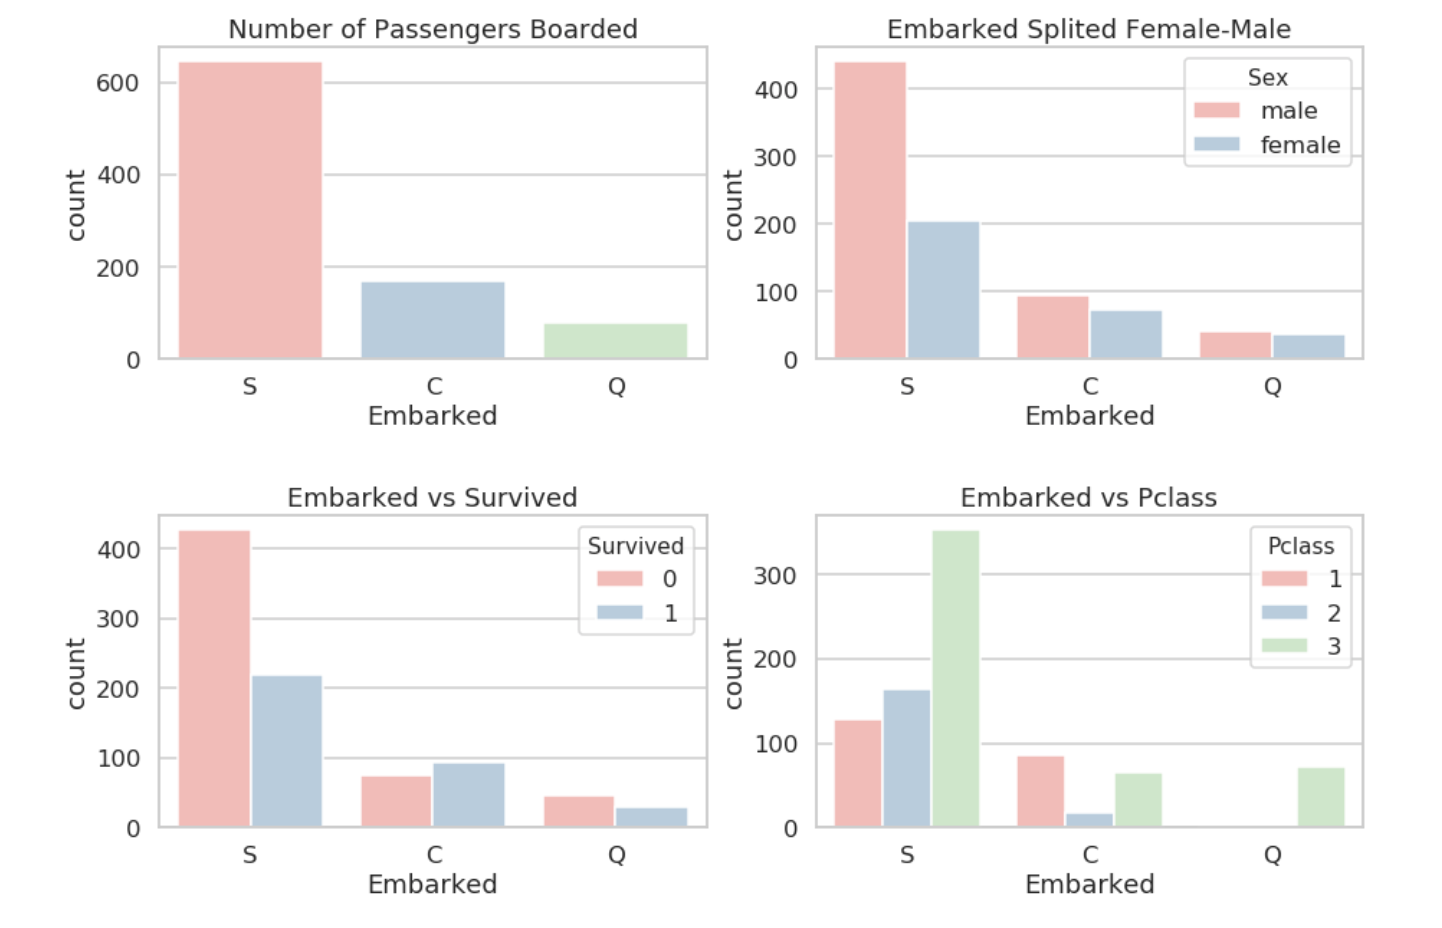

[Text(0.22000000000000003, 0, 'S'),
 Text(1.22, 0, 'C'),
 Text(2.2199999999999998, 0, 'Q')]

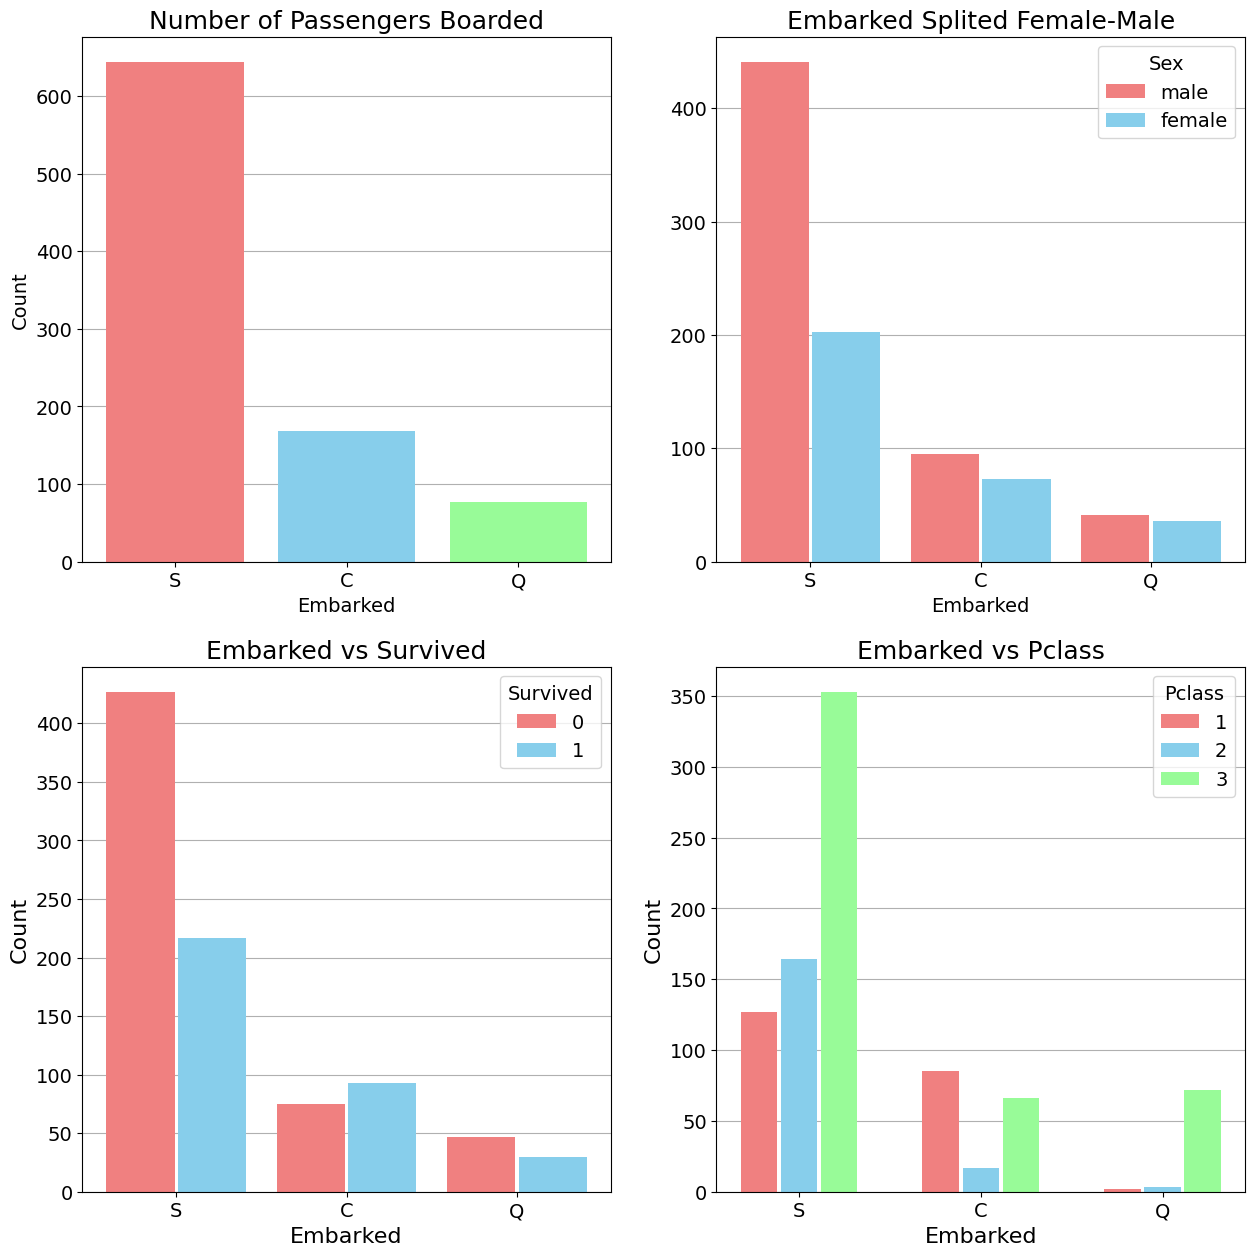

In [294]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

s_embarked = dataset[dataset["Embarked"] == "S"].shape[0]
c_embarked = dataset[dataset["Embarked"] == "C"].shape[0]
q_embarked = dataset[dataset["Embarked"] == "Q"].shape[0]

male_s_embarked = dataset[(dataset["Embarked"] == "S") & (dataset["Sex"] == 'male')].shape[0]
male_c_embarked = dataset[(dataset["Embarked"] == "C") & (dataset["Sex"] == 'male')].shape[0]
male_q_embarked = dataset[(dataset["Embarked"] == "Q") & (dataset["Sex"] == 'male')].shape[0]

female_s_embarked = dataset[(dataset["Embarked"] == "S") & (dataset["Sex"] == 'female')].shape[0]
female_c_embarked = dataset[(dataset["Embarked"] == "C") & (dataset["Sex"] == 'female')].shape[0]
female_q_embarked = dataset[(dataset["Embarked"] == "Q") & (dataset["Sex"] == 'female')].shape[0]

survived_s_embarked = dataset[(dataset["Embarked"] == "S") & (dataset["Survived"] == 1)].shape[0]
survived_c_embarked = dataset[(dataset["Embarked"] == "C") & (dataset["Survived"] == 1)].shape[0]
survived_q_embarked = dataset[(dataset["Embarked"] == "Q") & (dataset["Survived"] == 1)].shape[0]

not_survived_s_embarked = dataset[(dataset["Embarked"] == "S") & (dataset["Survived"] == 0)].shape[0]
not_survived_c_embarked = dataset[(dataset["Embarked"] == "C") & (dataset["Survived"] == 0)].shape[0]
not_survived_q_embarked = dataset[(dataset["Embarked"] == "Q") & (dataset["Survived"] == 0)].shape[0]

pclass1_s_embarked = dataset[(dataset["Embarked"] == "S") & (dataset["Pclass"] == 1)].shape[0]
pclass1_c_embarked = dataset[(dataset["Embarked"] == "C") & (dataset["Pclass"] == 1)].shape[0]
pclass1_q_embarked = dataset[(dataset["Embarked"] == "Q") & (dataset["Pclass"] == 1)].shape[0]

pclass2_s_embarked = dataset[(dataset["Embarked"] == "S") & (dataset["Pclass"] == 2)].shape[0]
pclass2_c_embarked = dataset[(dataset["Embarked"] == "C") & (dataset["Pclass"] == 2)].shape[0]
pclass2_q_embarked = dataset[(dataset["Embarked"] == "Q") & (dataset["Pclass"] == 2)].shape[0]

pclass3_s_embarked = dataset[(dataset["Embarked"] == "S") & (dataset["Pclass"] == 3)].shape[0]
pclass3_c_embarked = dataset[(dataset["Embarked"] == "C") & (dataset["Pclass"] == 3)].shape[0]
pclass3_q_embarked = dataset[(dataset["Embarked"] == "Q") & (dataset["Pclass"] == 3)].shape[0]

ax[0, 0].bar(["S", "C", "Q"], [s_embarked, c_embarked, q_embarked], width=0.8, color=["lightcoral", "skyblue", "palegreen"])
ax[0, 0].set_title("Number of Passengers Boarded", size=18)
ax[0, 0].set_xlabel("Embarked", size=14)
ax[0, 0].set_ylabel("Count", size=14)
ax[0, 0].tick_params(labelsize=14)
ax[0, 0].grid(axis="y")
ax[0, 0].set_axisbelow(True)

ax[0, 1].bar(["S", "C", "Q"], [male_s_embarked, male_c_embarked , male_q_embarked], width=0.4, color=["lightcoral"])
ax[0, 1].bar(np.arange(3) + 0.42, [female_s_embarked, female_c_embarked, female_q_embarked], width=0.4, color=["skyblue"])
ax[0, 1].set_title("Embarked Splited Female-Male", size=18)
ax[0, 1].set_xlabel("Embarked", size=14)
ax[0, 1].tick_params(labelsize=14)
ax[0, 1].legend(["male", "female"], title="Sex", fontsize=14, title_fontsize=14)
ax[0, 1].grid(axis="y")
ax[0, 1].set_axisbelow(True)
ax[0, 1].set_xticks(np.arange(3) + 0.39 - 0.180)
ax[0, 1].set_xticklabels(["S", "C", "Q"])

ax[1, 0].bar(["S", "C", "Q"], [not_survived_s_embarked, not_survived_c_embarked, not_survived_q_embarked], width=0.4, color=["lightcoral"])
ax[1, 0].bar(np.arange(3) + 0.42, [survived_s_embarked, survived_c_embarked, survived_q_embarked], width=0.4, color=["skyblue"])
ax[1, 0].set_title("Embarked vs Survived", size=18)
ax[1, 0].set_ylabel("Count", size=16)
ax[1, 0].set_xlabel("Embarked", size=16)
ax[1, 0].tick_params(labelsize=14)
ax[1, 0].legend(["0", "1"], title="Survived", fontsize=14, title_fontsize=14)
ax[1, 0].grid(axis="y")
ax[1, 0].set_axisbelow(True)
ax[1, 0].set_xticks(np.arange(3) + 0.39 - 0.180)
ax[1, 0].set_xticklabels(["S", "C", "Q"])

ax[1, 1].bar(["S", "C", "Q"], [pclass1_s_embarked, pclass1_c_embarked, pclass1_q_embarked], width=0.2, color=["lightcoral"])
ax[1, 1].bar(np.arange(3) + 0.22, [pclass2_s_embarked, pclass2_c_embarked, pclass2_q_embarked], width=0.2, color=["skyblue"])
ax[1, 1].bar(np.arange(3) + 0.44, [pclass3_s_embarked, pclass3_c_embarked, pclass3_q_embarked], width=0.2, color=["palegreen"])
ax[1, 1].set_title("Embarked vs Pclass", size=18)
ax[1, 1].set_ylabel("Count", size=16)
ax[1, 1].set_xlabel("Embarked", size=16)
ax[1, 1].tick_params(labelsize=14)
ax[1, 1].legend(["1", "2", "3"], title="Pclass", fontsize=14, title_fontsize=14)
ax[1, 1].grid(axis="y")
ax[1, 1].set_axisbelow(True)
ax[1, 1].set_xticks(np.arange(3) + 0.40 - 0.180)
ax[1, 1].set_xticklabels(["S", "C", "Q"])


***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

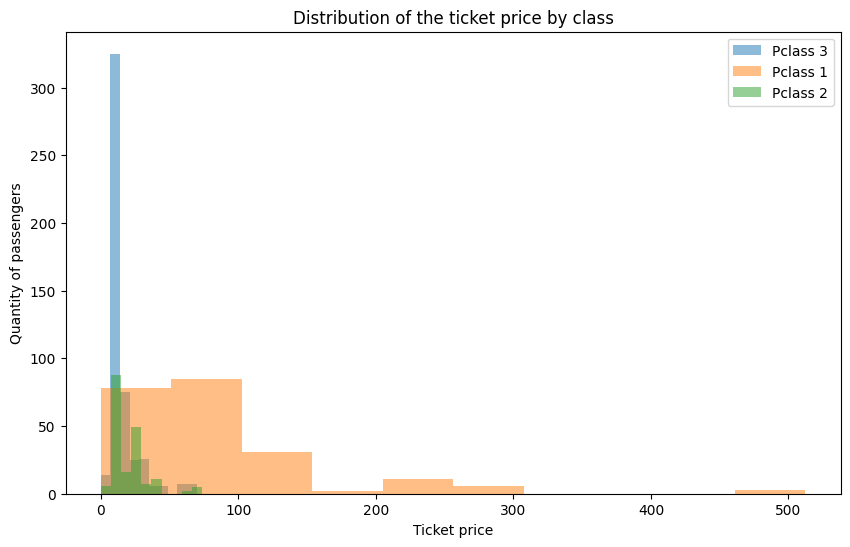

In [16]:
plt.figure(figsize=(10, 6))

for pclass in dataset['Pclass'].unique():
    plt.hist(dataset[dataset['Pclass'] == pclass]['Fare'], alpha=0.5)

plt.title('Distribution of the ticket price by class')
plt.xlabel('Ticket price')
plt.ylabel('Quantity of passengers')
plt.legend(["Pclass 3", "Pclass 1", "Pclass 2"])
plt.show()

Цей графік показує розподіл вартості квитка для кожного класу пасажирів. Кожна гістограма відображає кількість пасажирів у певному класі, які заплатили певну ціну за квиток. З графіка видно, що пасажири 3-го класу в основному купували дешеві квитки, тоді як пасажири 2-го та 1-го класу купували дорожчі квитки.

Прокоментуйте побудовані графіки